#Feature Engineering with Python Project

###Defining the Research Question 

####Background 

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa. The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical solutions for Africa’s dynamic transportation needs, from developing apps and web solutions to providing dedicated support for goods on the move.

####Problem Statement 

Sendy has hired you to help predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at the final destination. Build a model that predicts an accurate delivery time, from picking up a package arriving at the final destination. An accurate arrival time prediction will help all business to improve their logistics and communicate the accurate time their time to their customers. You will be required to perform various feature engineering techniques while preparing your data for further analysis.

###Data Importation 

####Import important Libraries

In [1]:
# Importing important libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA


In [9]:
# Dataset URL = https://bit.ly/3deaKEM
# import the data and preview

transportation_df = pd.read_csv("https://bit.ly/3deaKEM")

pd.set_option('display.max_columns', None)

transportation_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


###Data Exploration

In [10]:
# Check the dataset size
transportation_df.shape

(21201, 29)

In [11]:
# Check for NaN values 
transportation_df.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [12]:
# Summary stats for the data set
transportation_df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


###Data Cleaning

In [13]:
# standardize column names to lower case and strip leading and trailing whitespaces
transportation_df.columns = transportation_df.columns.str.lower().str.strip()
transportation_df.columns

Index(['order no', 'user id', 'vehicle type', 'platform type',
       'personal or business', 'placement - day of month',
       'placement - weekday (mo = 1)', 'placement - time',
       'confirmation - day of month', 'confirmation - weekday (mo = 1)',
       'confirmation - time', 'arrival at pickup - day of month',
       'arrival at pickup - weekday (mo = 1)', 'arrival at pickup - time',
       'pickup - day of month', 'pickup - weekday (mo = 1)', 'pickup - time',
       'arrival at destination - day of month',
       'arrival at destination - weekday (mo = 1)',
       'arrival at destination - time', 'distance (km)', 'temperature',
       'precipitation in millimeters', 'pickup lat', 'pickup long',
       'destination lat', 'destination long', 'rider id',
       'time from pickup to arrival'],
      dtype='object')

In [14]:
# Handing NaN values
'''
We notice that (Temperature 4366) and (Precipitation in millimeters  20649) are the only values with Missing data
To handle it, we Will drop 'Precipitation in millimeters' since most records are missing and does not significalty affect estimated delivery time
We will replace 'Temperature' with its mean 
'''
transportation_df.drop(["precipitation in millimeters"], axis=1, inplace=True)
transportation_df.fillna(transportation_df.mean(), inplace=True)

transportation_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),placement - time,confirmation - day of month,confirmation - weekday (mo = 1),confirmation - time,arrival at pickup - day of month,arrival at pickup - weekday (mo = 1),arrival at pickup - time,pickup - day of month,pickup - weekday (mo = 1),pickup - time,arrival at destination - day of month,arrival at destination - weekday (mo = 1),arrival at destination - time,distance (km),temperature,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [15]:
# Check for nan which should now be zero
transportation_df.isna().sum()

order no                                     0
user id                                      0
vehicle type                                 0
platform type                                0
personal or business                         0
placement - day of month                     0
placement - weekday (mo = 1)                 0
placement - time                             0
confirmation - day of month                  0
confirmation - weekday (mo = 1)              0
confirmation - time                          0
arrival at pickup - day of month             0
arrival at pickup - weekday (mo = 1)         0
arrival at pickup - time                     0
pickup - day of month                        0
pickup - weekday (mo = 1)                    0
pickup - time                                0
arrival at destination - day of month        0
arrival at destination - weekday (mo = 1)    0
arrival at destination - time                0
distance (km)                                0
temperature  

###Data Analysis (Univariate and Bivariate)

In [16]:
# Univariate

transportation_df.describe()

,platform type,placement - day of month,placement - weekday (mo = 1),confirmation - day of month,confirmation - weekday (mo = 1),arrival at pickup - day of month,arrival at pickup - weekday (mo = 1),pickup - day of month,pickup - weekday (mo = 1),arrival at destination - day of month,arrival at destination - weekday (mo = 1),distance (km),temperature,pickup lat,pickup long,destination lat,destination long,time from pickup to arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


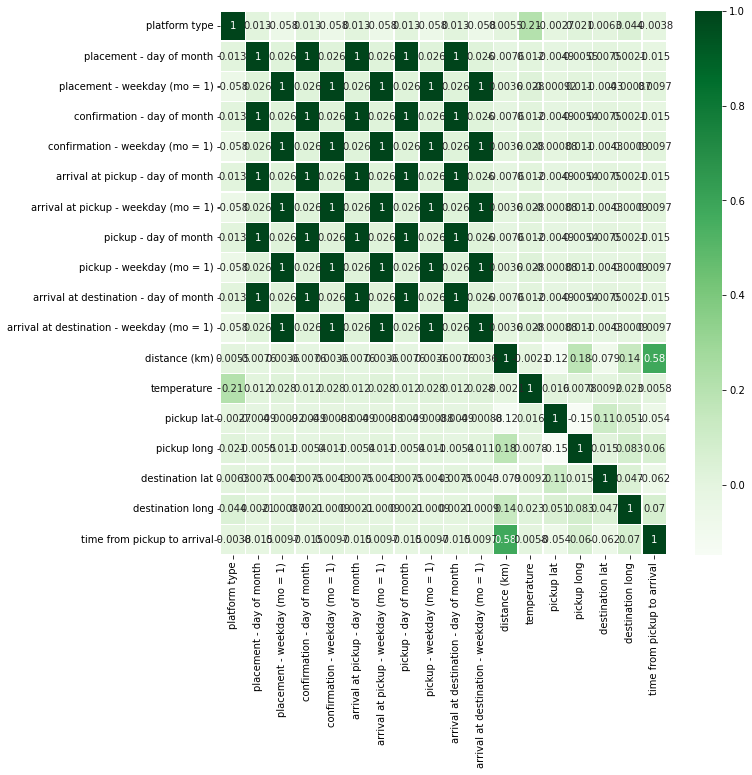

In [18]:
# See how our variable correlate with the Y target value
# Plotting a correlation matrix
# ---
#
df_corr = transportation_df.corr()
plt.figure(figsize=(10,10))

# We then plot our heatmap visualistion
# 

sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap='Greens');

###Data Preparation

In [19]:
# Drop columns that are not important for our models
transportation_df.head()

,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),placement - time,confirmation - day of month,confirmation - weekday (mo = 1),confirmation - time,arrival at pickup - day of month,arrival at pickup - weekday (mo = 1),arrival at pickup - time,pickup - day of month,pickup - weekday (mo = 1),pickup - time,arrival at destination - day of month,arrival at destination - weekday (mo = 1),arrival at destination - time,distance (km),temperature,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [20]:
# Convert categorical data to numerical using ordinal encoding 

enc = OrdinalEncoder()
transportation_df[["order no","user id", "vehicle type", "personal or business", "rider id"]] = enc.fit_transform(
    transportation_df[["order no","user id", "vehicle type", "personal or business", "rider id"]])

transportation_df.head()

,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),placement - time,confirmation - day of month,confirmation - weekday (mo = 1),confirmation - time,arrival at pickup - day of month,arrival at pickup - weekday (mo = 1),arrival at pickup - time,pickup - day of month,pickup - weekday (mo = 1),pickup - time,arrival at destination - day of month,arrival at destination - weekday (mo = 1),arrival at destination - time,distance (km),temperature,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival
0,16358.0,2839.0,0.0,3,0.0,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,362.0,745
1,12783.0,1212.0,0.0,3,1.0,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,812.0,1993
2,7485.0,1560.0,0.0,3,0.0,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,61.0,455
3,20667.0,381.0,0.0,3,0.0,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,811.0,1341
4,14863.0,690.0,0.0,1,1.0,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,720.0,1214


In [22]:
# placement time to time components 
transportation_df["placement_time_hour"] = pd.to_datetime(transportation_df["placement - time"], format="%I:%M:%S %p").dt.hour
transportation_df["placement_time_minute"] = pd.to_datetime(transportation_df["placement - time"], format="%I:%M:%S %p").dt.minute
transportation_df["placement_time_second"] = pd.to_datetime(transportation_df["placement - time"], format="%I:%M:%S %p").dt.second

# confirmation - time to time components 
transportation_df["confirmation_time_hour"] = pd.to_datetime(transportation_df["confirmation - time"], format="%I:%M:%S %p").dt.hour
transportation_df["confirmation_time_minute"] = pd.to_datetime(transportation_df["confirmation - time"], format="%I:%M:%S %p").dt.minute
transportation_df["confirmation_time_second"] = pd.to_datetime(transportation_df["confirmation - time"], format="%I:%M:%S %p").dt.second

# arrival at pickup - time to time components 
transportation_df["arrival at pickup_time_hour"] = pd.to_datetime(transportation_df["arrival at pickup - time"], format="%I:%M:%S %p").dt.hour
transportation_df["arrival at pickup_time_minute"] = pd.to_datetime(transportation_df["arrival at pickup - time"], format="%I:%M:%S %p").dt.minute
transportation_df["arrival at pickup_time_second"] = pd.to_datetime(transportation_df["arrival at pickup - time"], format="%I:%M:%S %p").dt.second

# pickup - time to time components 
transportation_df["pickup_time_hour"] = pd.to_datetime(transportation_df["pickup - time"], format="%I:%M:%S %p").dt.hour
transportation_df["pickup_time_minute"] = pd.to_datetime(transportation_df["pickup - time"], format="%I:%M:%S %p").dt.minute
transportation_df["pickup_time_second"] = pd.to_datetime(transportation_df["pickup - time"], format="%I:%M:%S %p").dt.second

# arrival at destination - time to time components 
transportation_df["arrival at destination_time_hour"] = pd.to_datetime(transportation_df["arrival at destination - time"], format="%I:%M:%S %p").dt.hour
transportation_df["arrival at destination_time_minute"] = pd.to_datetime(transportation_df["arrival at destination - time"], format="%I:%M:%S %p").dt.minute
transportation_df["arrival at destination_time_second"] = pd.to_datetime(transportation_df["arrival at destination - time"], format="%I:%M:%S %p").dt.second

transportation_df.head()

,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),placement - time,confirmation - day of month,confirmation - weekday (mo = 1),confirmation - time,arrival at pickup - day of month,arrival at pickup - weekday (mo = 1),arrival at pickup - time,pickup - day of month,pickup - weekday (mo = 1),pickup - time,arrival at destination - day of month,arrival at destination - weekday (mo = 1),arrival at destination - time,distance (km),temperature,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival,placement_time_hour,placement_time_minute,placement_time_second,confirmation_time_hour,confirmation_time_minute,confirmation_time_second,arrival at pickup_time_hour,arrival at pickup_time_minute,arrival at pickup_time_second,pickup_time_hour,pickup_time_minute,pickup_time_second,arrival at destination_time_hour,arrival at destination_time_minute,arrival at destination_time_second
0,16358.0,2839.0,0.0,3,0.0,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,362.0,745,9,35,46,9,40,10,10,4,47,10,27,30,10,39,55
1,12783.0,1212.0,0.0,3,1.0,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,812.0,1993,11,16,16,11,23,21,11,40,22,11,44,9,12,17,22
2,7485.0,1560.0,0.0,3,0.0,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,61.0,455,12,39,25,12,42,44,12,49,34,12,53,3,13,0,38
3,20667.0,381.0,0.0,3,0.0,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,811.0,1341,9,25,34,9,26,5,9,37,56,9,43,6,10,5,27
4,14863.0,690.0,0.0,1,1.0,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,720.0,1214,9,55,18,9,56,18,10,3,53,10,5,23,10,25,37


In [23]:
# Drop time columns since new columns have been derived from them
transportation_df.drop(["placement - time", "confirmation - time", "arrival at pickup - time","pickup - time","arrival at destination - time"], inplace=True, axis = 1)

In [ ]:
transportation_df.head()

,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),confirmation - day of month,confirmation - weekday (mo = 1),arrival at pickup - day of month,arrival at pickup - weekday (mo = 1),pickup - day of month,pickup - weekday (mo = 1),arrival at destination - day of month,arrival at destination - weekday (mo = 1),distance (km),temperature,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival,placement_time_hour,placement_time_minute,placement_time_second,confirmation_time_hour,confirmation_time_minute,confirmation_time_second,arrival at pickup_time_hour,arrival at pickup_time_minute,arrival at pickup_time_second,pickup_time_hour,pickup_time_minute,pickup_time_second,arrival at destination_time_hour,arrival at destination_time_minute,arrival at destination_time_second
0,16358.0,2839.0,0.0,3,0.0,9,5,9,5,9,5,9,5,9,5,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,362.0,745,9,35,46,9,40,10,10,4,47,10,27,30,10,39,55
1,12783.0,1212.0,0.0,3,1.0,12,5,12,5,12,5,12,5,12,5,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,812.0,1993,11,16,16,11,23,21,11,40,22,11,44,9,12,17,22
2,7485.0,1560.0,0.0,3,0.0,30,2,30,2,30,2,30,2,30,2,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,61.0,455,12,39,25,12,42,44,12,49,34,12,53,3,13,0,38
3,20667.0,381.0,0.0,3,0.0,15,5,15,5,15,5,15,5,15,5,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,811.0,1341,9,25,34,9,26,5,9,37,56,9,43,6,10,5,27
4,14863.0,690.0,0.0,1,1.0,13,1,13,1,13,1,13,1,13,1,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,720.0,1214,9,55,18,9,56,18,10,3,53,10,5,23,10,25,37


####Feature construction

In [24]:
# Create new features 
# speed = distance/time

transportation_df["speed"] = transportation_df["distance (km)"]/transportation_df["time from pickup to arrival"]


In [25]:
# manhattan distance
transportation_df["manhattan distance"] = abs(transportation_df["destination lat"] - transportation_df["pickup lat"]) + abs(transportation_df["destination long"] - transportation_df["pickup long"])


In [26]:
# haversine distance
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM 
    return km

transportation_df['haversine_dist'] = haversine_vectorize(transportation_df['pickup long'],transportation_df['pickup lat'],transportation_df['destination long'],transportation_df['destination lat'])

transportation_df.head()

,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),confirmation - day of month,confirmation - weekday (mo = 1),arrival at pickup - day of month,arrival at pickup - weekday (mo = 1),pickup - day of month,pickup - weekday (mo = 1),arrival at destination - day of month,arrival at destination - weekday (mo = 1),distance (km),temperature,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival,placement_time_hour,placement_time_minute,placement_time_second,confirmation_time_hour,confirmation_time_minute,confirmation_time_second,arrival at pickup_time_hour,arrival at pickup_time_minute,arrival at pickup_time_second,pickup_time_hour,pickup_time_minute,pickup_time_second,arrival at destination_time_hour,arrival at destination_time_minute,arrival at destination_time_second,speed,manhattan distance,haversine_dist
0,16358.0,2839.0,0.0,3,0.0,9,5,9,5,9,5,9,5,9,5,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,362.0,745,9,35,46,9,40,10,10,4,47,10,27,30,10,39,55,0.005369,0.017978,1.929121
1,12783.0,1212.0,0.0,3,1.0,12,5,12,5,12,5,12,5,12,5,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,812.0,1993,11,16,16,11,23,21,11,40,22,11,44,9,12,17,22,0.008028,0.141406,11.332729
2,7485.0,1560.0,0.0,3,0.0,30,2,30,2,30,2,30,2,30,2,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,61.0,455,12,39,25,12,42,44,12,49,34,12,53,3,13,0,38,0.006593,0.022588,1.878898
3,20667.0,381.0,0.0,3,0.0,15,5,15,5,15,5,15,5,15,5,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,811.0,1341,9,25,34,9,26,5,9,37,56,9,43,6,10,5,27,0.006711,0.061487,4.940355
4,14863.0,690.0,0.0,1,1.0,13,1,13,1,13,1,13,1,13,1,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,720.0,1214,9,55,18,9,56,18,10,3,53,10,5,23,10,25,37,0.007414,0.046142,3.722490


In [27]:
# bearing
import math
def get_bearing(lat1,lon1,lat2,lon2):
    dLon = lon2 - lon1;
    y = np.sin(dLon) * np.cos(lat2);
    x = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dLon);
    brng = np.rad2deg(np.arctan2(y, x));

    return brng

transportation_df['bearing'] = get_bearing(transportation_df['pickup lat'],transportation_df['pickup long'],transportation_df['destination lat'],transportation_df['destination long'])
transportation_df.head()

,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),confirmation - day of month,confirmation - weekday (mo = 1),arrival at pickup - day of month,arrival at pickup - weekday (mo = 1),pickup - day of month,pickup - weekday (mo = 1),arrival at destination - day of month,arrival at destination - weekday (mo = 1),distance (km),temperature,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival,placement_time_hour,placement_time_minute,placement_time_second,confirmation_time_hour,confirmation_time_minute,confirmation_time_second,arrival at pickup_time_hour,arrival at pickup_time_minute,arrival at pickup_time_second,pickup_time_hour,pickup_time_minute,pickup_time_second,arrival at destination_time_hour,arrival at destination_time_minute,arrival at destination_time_second,speed,manhattan distance,haversine_dist,bearing
0,16358.0,2839.0,0.0,3,0.0,9,5,9,5,9,5,9,5,9,5,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,362.0,745,9,35,46,9,40,10,10,4,47,10,27,30,10,39,55,0.005369,0.017978,1.929121,-0.555154
1,12783.0,1212.0,0.0,3,1.0,12,5,12,5,12,5,12,5,12,5,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,812.0,1993,11,16,16,11,23,21,11,40,22,11,44,9,12,17,22,0.008028,0.141406,11.332729,-22.618288
2,7485.0,1560.0,0.0,3,0.0,30,2,30,2,30,2,30,2,30,2,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,61.0,455,12,39,25,12,42,44,12,49,34,12,53,3,13,0,38,0.006593,0.022588,1.878898,-28.963699
3,20667.0,381.0,0.0,3,0.0,15,5,15,5,15,5,15,5,15,5,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,811.0,1341,9,25,34,9,26,5,9,37,56,9,43,6,10,5,27,0.006711,0.061487,4.940355,-25.683415
4,14863.0,690.0,0.0,1,1.0,13,1,13,1,13,1,13,1,13,1,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,720.0,1214,9,55,18,9,56,18,10,3,53,10,5,23,10,25,37,0.007414,0.046142,3.722490,170.396716


###Data Modeling

In [ ]:
# Feature Selection ○ Filter methods ○ Feature transformation (PCA, LDA, etc) ○ Wrapper methods

In [28]:
# Feature Selection 
# We will use this as as our base for our solution, then perform feature engineering 
# by filter methods.
# get X and Y (ie features and target) and split the data to train and validation datasets
X = transportation_df.drop(["time from pickup to arrival"], axis = 1)
Y = transportation_df["time from pickup to arrival"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=1234)

norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, Y_train)
knn_regressor.fit(X_train, Y_train)
dec_regressor.fit(X_train, Y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models  
print(f'SVM RMSE: {mean_squared_error(Y_test, svm_y_pred, squared= False)}')
print(f'KNN RMSE: {mean_squared_error(Y_test, knn_y_pred, squared= False)}')
print(f'Decision Tree RMSE: {mean_squared_error(Y_test, dec_y_pred, squared= False)}')



SVM RMSE: 858.5075953284493
KNN RMSE: 913.675214686524
Decision Tree RMSE: 100.38431715151265


####Filter methods: Pearson's Correlation Coefficient

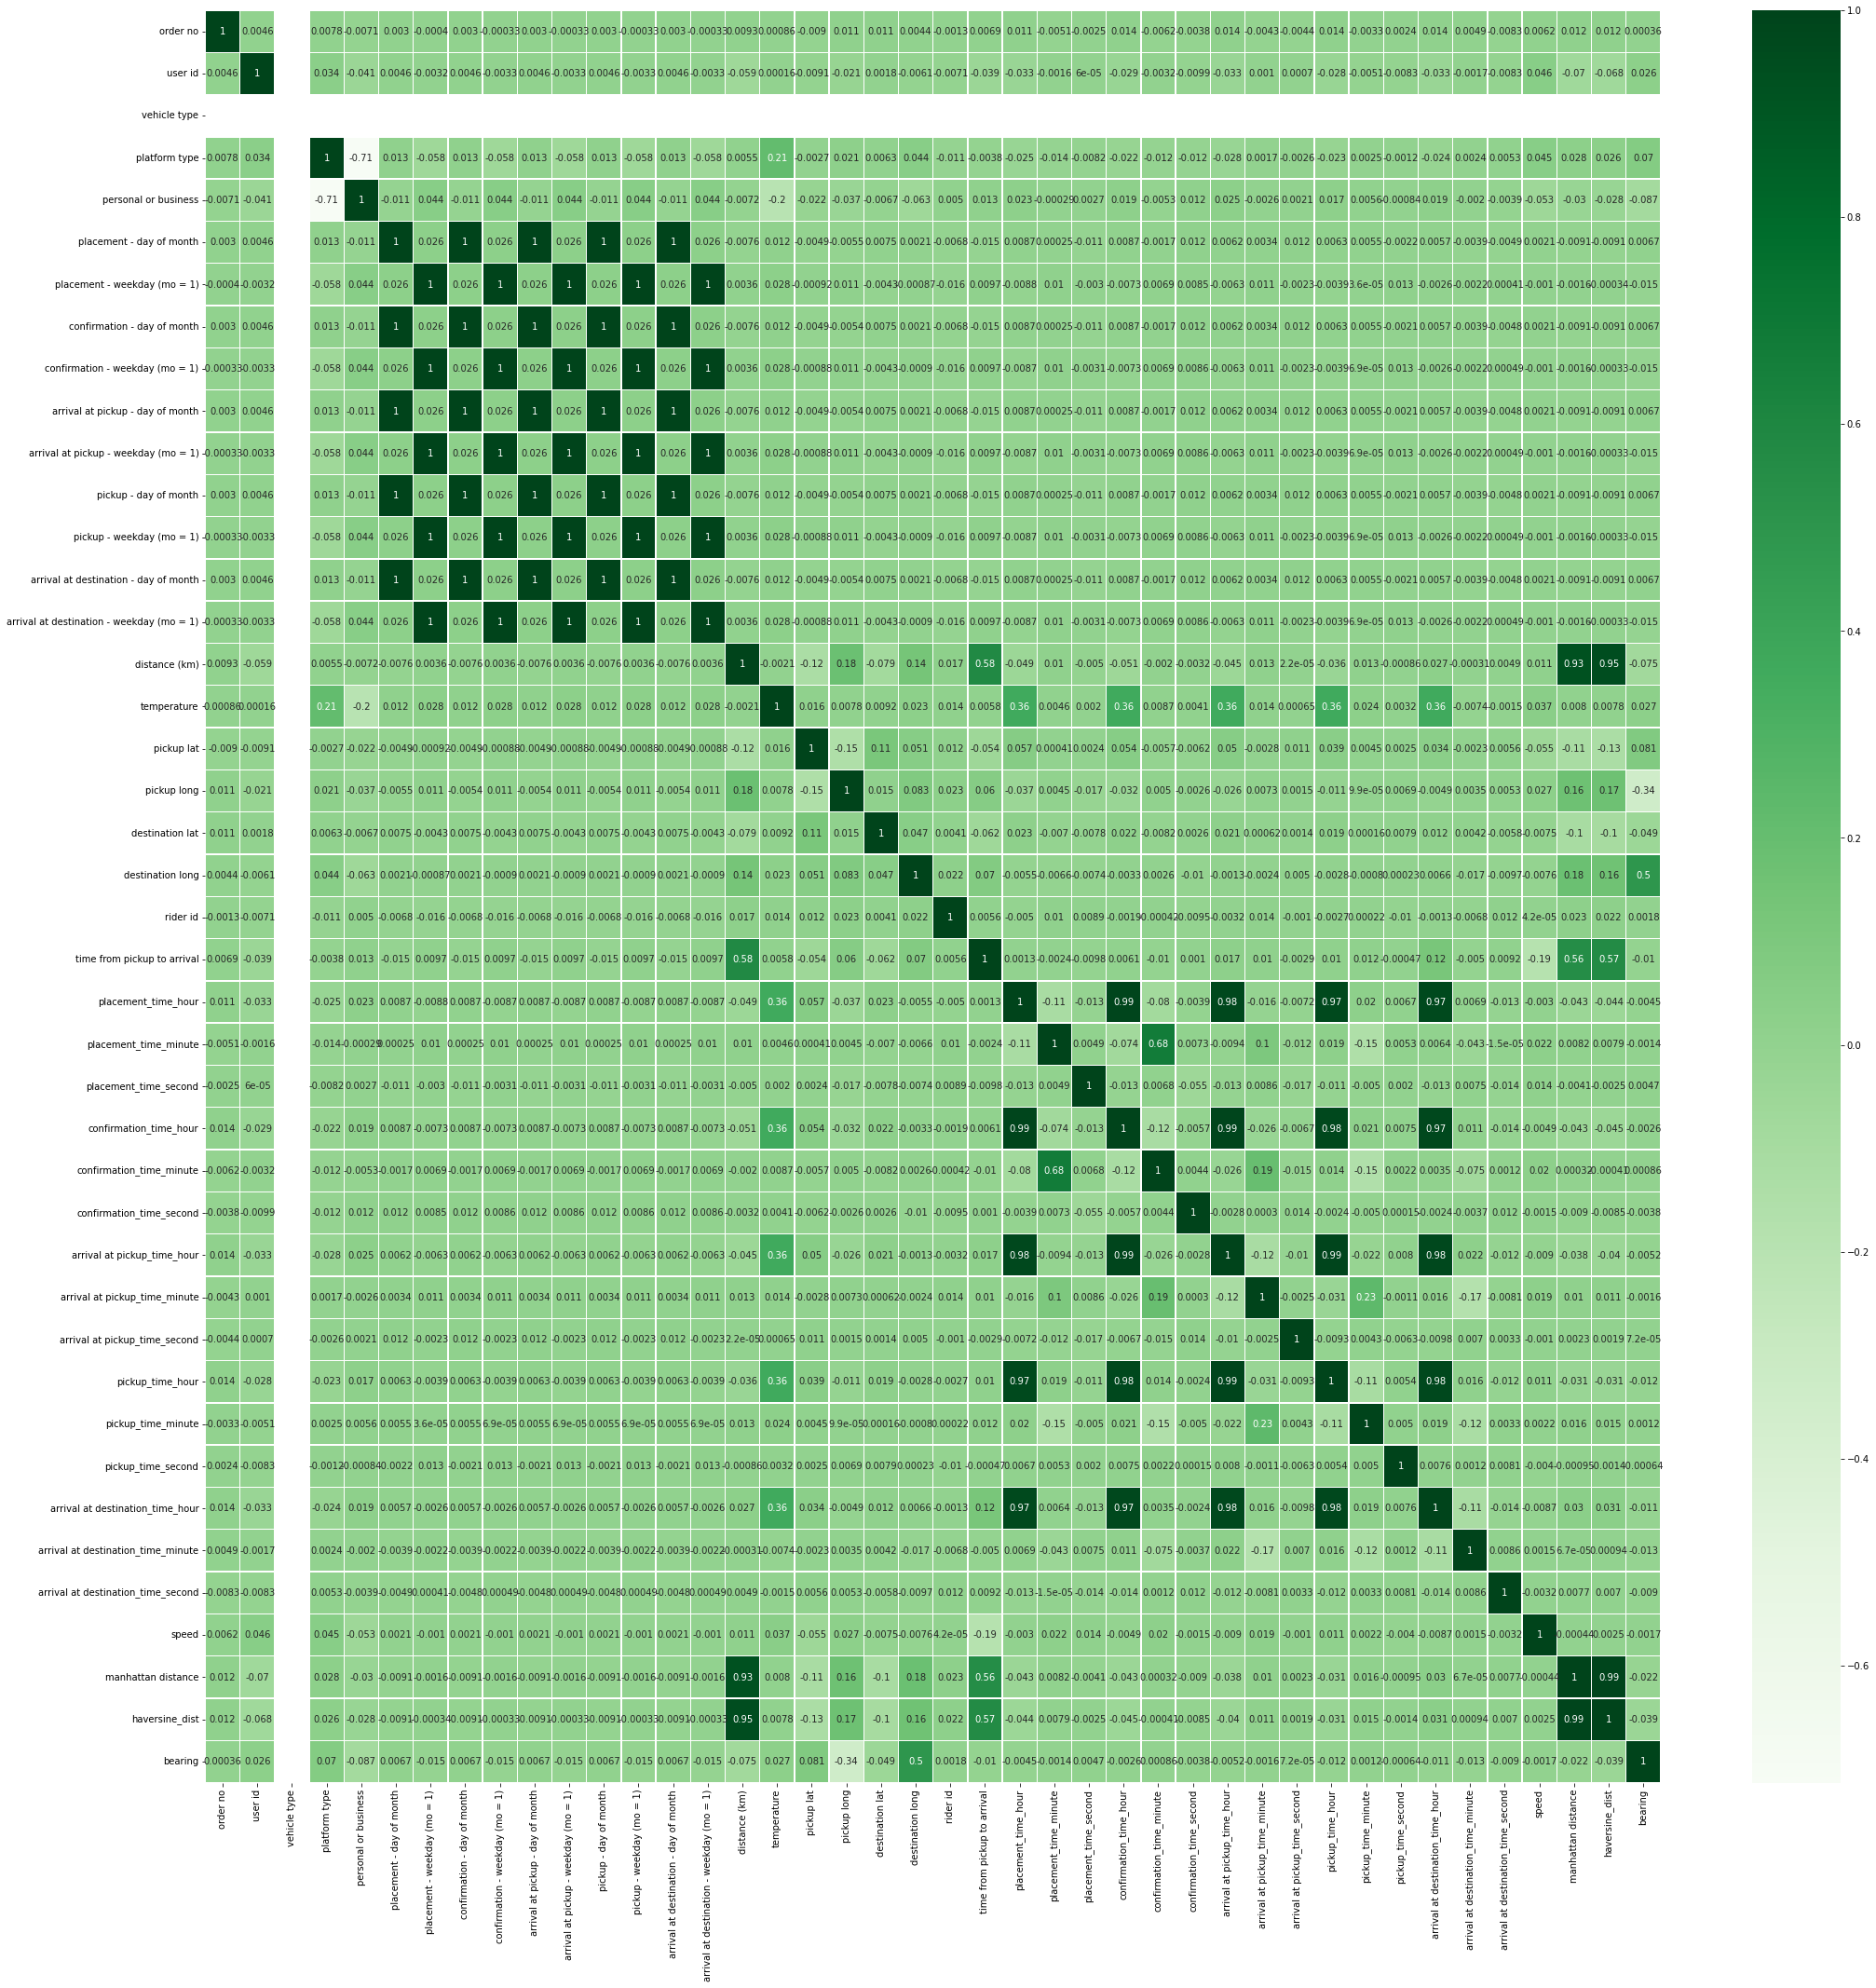

In [29]:
# Pearson's Correlation Coefficient
# appply filter methods by plotting a correlation matrix
# ---
#
df_corr = transportation_df.corr()
plt.figure(figsize=(35,35))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap='Greens');


In [30]:
# We resolve to drop columns that have a weaker correlation to our target variable
          # vehicle type	
          # pickup_time_second
          # arrival at pickup_time_second	
          # confirmation_time_second
          # placement_time_minute
          # placement_time_hour
# Feature Selection 

# get X and Y (ie features and target) and split the data to train and validation datasets
X = transportation_df.drop(["time from pickup to arrival", "vehicle type","pickup_time_second",
             "arrival at pickup_time_second","confirmation_time_second","placement_time_minute","placement_time_hour" ], axis = 1)
Y = transportation_df["time from pickup to arrival"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=1234)

norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, Y_train)
knn_regressor.fit(X_train, Y_train)
dec_regressor.fit(X_train, Y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models  
print(f'SVM RMSE: {mean_squared_error(Y_test, svm_y_pred, squared= False)}')
print(f'KNN RMSE: {mean_squared_error(Y_test, knn_y_pred, squared= False)}')
print(f'Decision Tree RMSE: {mean_squared_error(Y_test, dec_y_pred, squared= False)}')

SVM RMSE: 850.9263059216776
KNN RMSE: 888.33899600557
Decision Tree RMSE: 105.83564047946668


**Obervations:**

**base model:**

SVM RMSE: 858.5075953284493

KNN RMSE: 913.675214686524

Decision Tree RMSE: 100.38431715151265

**Filter method:**

SVM RMSE: 850.9263059216776

KNN RMSE: 888.33899600557

Decision Tree RMSE: 105.83564047946668


####Wrapper Method: Step Forward Feature Selection

In [31]:
# We'll need import and install the following packages: six, sys, mlrose and joblib
# to use `SequentialFeatureSelector` for feature selection from mlxtend.
# ---
#

# importing six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six

# installing mlrose
!pip install mlrose
import mlrose

# importing joblib
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=923366547e3e2d6b57ec0a8cb0e2a55a39f35d4b9d65a42978882a8d9b8d8cfa
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [39]:
# get X and Y (ie features and target) and split the data to train and validation datasets
X = transportation_df.drop(["time from pickup to arrival"], axis = 1)
Y = transportation_df["time from pickup to arrival"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=1234)

from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features=10,
           forward=True,
           verbose=2,
           scoring='r2',
           cv=4)
 
 # Perform step forward feature selection
feature_selector = feature_selector.fit(X_train, Y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    2.0s finished

[2022-11-26 06:11:55] Features: 1/10 -- score: 0.34670224787387083[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.2s finished

[2022-11-26 06:11:57] Features: 2/10 -- score: 0.9955705885657351[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    4.6s finished

[2022-11-26 06:12:02] Features: 3/10 -- score: 0.995255116153181[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [33]:
# Which are the selected features?
# The columns at these indexes are those which were selected
# ---
#
feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [40]:
# We can now use those features to build our model
# ---
# 
from sklearn.linear_model import LinearRegression

# Without step forward feature selection (sffs)
dec_regressor = DecisionTreeRegressor(random_state=27)
dec_regressor.fit(X_train, Y_train)

# With step forward feature selection
dec_regressor2 = DecisionTreeRegressor(random_state=27)
dec_regressor2.fit(X_train.iloc[:, feat_cols].values, Y_train)

# Making Predictions and determining the accuracies
y_test_pred = dec_regressor.predict(X_test)
print('Decision Tree RMSE Without sffs:', mean_squared_error(Y_test, y_test_pred, squared = False))

y_test_pred2 = dec_regressor2.predict(X_test.iloc[:, feat_cols].values)
print('Decision Tree RMSE with sffs:', mean_squared_error(Y_test, y_test_pred2, squared = False))

Decision Tree RMSE Without sffs: 106.73948331626353
Decision Tree RMSE with sffs: 1404.6542696485958


####Feature Transformation:Principal Component Analysis

In [41]:
# using the principal component analysis (PCA) to reduce our features into components.

# We select our features
# get X and Y (ie features and target) and split the data to train and validation datasets
X = transportation_df.drop(["time from pickup to arrival"], axis = 1)
Y =transportation_df["time from pickup to arrival"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=1234)

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Applying PCA
# ---
# NB: PCA relies the feature set and not the label data.
# ---
# 

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, Y_train)
knn_regressor.fit(X_train, Y_train)
dec_regressor.fit(X_train, Y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', mean_squared_error(Y_test, svm_y_pred, squared=False))
print('KNN RMSE:', mean_squared_error(Y_test, knn_y_pred, squared=False))
print('Decision Tree RMSE:', mean_squared_error(Y_test, dec_y_pred, squared=False))

SVM RMSE: 866.2540248889629
KNN RMSE: 913.675214686524
Decision Tree RMSE: 329.5151477513941


###Challenging your Solution

Most of the features had low correlations with the target but the newly created features using feature construction helped to improve the quality of our models.

###Recommendations / Conclusion

The dataset provided was adequate for modelling. we were able to get accepable metrics for predicting the time it takes for an order to be fulfilled which will help sendy in correctly predicting this time for future clients 